<a href="https://colab.research.google.com/github/JesiJackson/Naive-Bayes/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project, we suppose that work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. We will build a model that predicts whether a player will have an NBA career lasting five years or more.

The data for this project consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Our target variable is a Boolean value that indicates whether a given player will last in the league for five years.

In [1]:
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [2]:
data = pd.read_csv('extracted_nba_players_data.csv')

In [3]:
data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


In [4]:
# Define the y (target) variable.
y = data['target_5yrs']
# Define the X (predictor) variables.
X = data.drop('target_5yrs', axis = 1)

Given that the target variable contains both 1 and 0 indicates that it is binary and requires a model suitable for binary classification.

The predictor variables are continuous numerical values, so it is important that the model selected is suitable for continuous features.

Now, we are going to divide our data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows us to reserve a part of the data that the model has not observe.

In [5]:
# Split the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

Using the assumption that our features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for our data. While our data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results.

In [7]:
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [12]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"F1 : {metrics.f1_score(y_test, y_pred):.2f}")

Accuracy: 0.69
Precision: 0.84
Recall: 0.59
F1 : 0.69


The model shows a precision score of 0.84, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years—while balancing false positives. The recall score of 0.59 shows worse performance in predicting true negatives—where the player will not play for five years or more—while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.6905, which suggests reasonable predictive power in this model.

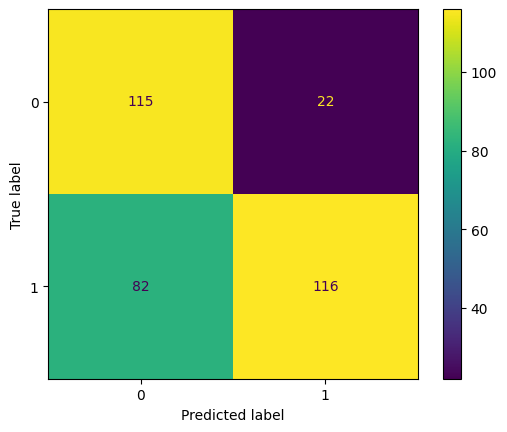

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

- The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.
- The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).
- The model created provides some value in predicting an NBA player's chances of playing for five years or more.
- Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.